# section 1: History of Spreadsheets

---

In [1]:
import pandas as pd 
import numpy as np 
import requests


In [2]:
df = pd.read_csv("fortune500.csv")

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [5]:
df.describe()

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


In [6]:
df.shape

(25500, 5)

In [7]:
#from the alpha vantage timeseries
from alpha_vantage.timeseries import TimeSeries
#API_key to access timeseries 
API_key = "9TCAAG9682HEZFMD"
#Storing timeseries in variable and formatting into pandas. 
ts = TimeSeries(key = API_key,output_format="pandas")
#Requesting monthly adjusted price of TSLA
data = ts.get_monthly_adjusted('TSLA' )
#Printing Data
data[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2022-12-13,197.080,198.9200,156.9100,160.950,160.9500,9.108758e+08,0.0
2022-11-30,234.050,237.3951,166.1850,194.700,194.7000,1.885408e+09,0.0
2022-10-31,254.500,257.5000,198.5863,227.540,227.5400,1.735578e+09,0.0
2022-09-30,272.575,313.8000,262.4700,265.250,265.2500,1.298711e+09,0.0
2022-08-31,903.825,944.0000,271.8100,275.610,275.6100,7.344316e+08,0.0
...,...,...,...,...,...,...,...
2010-11-30,21.940,36.0000,21.0500,35.330,2.3553,2.831510e+07,0.0
2010-10-29,20.690,21.8700,20.0000,21.840,1.4560,6.547800e+06,0.0
2010-09-30,19.620,23.1600,19.5000,20.405,1.3603,1.804590e+07,0.0


In [8]:
#from alpha_vantage imported fundamentaldata
from alpha_vantage.fundamentaldata import FundamentalData
#API access key 
key = "9TCAAG9682HEZFMD"
#Fundamental data with key format into pandas
fd = FundamentalData(key,output_format ="pandas")
#requested for Tesla income statement annual
data = fd.get_income_statement_annual("TSLA")

data[0].T


date,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004
fiscalDateEnding,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31
reportedCurrency,USD,USD,USD,USD,USD
grossProfit,13606000000,6630000000,4069000000,4042000000,2223000000
totalRevenue,53823000000,31536000000,24578000000,21461000000,11759000000
costOfRevenue,40217000000,24906000000,20509000000,17419000000,9536000000
costofGoodsAndServicesSold,374000000,289000000,193000000,85272000,7797183000
operatingIncome,6523000000,1994000000,-69000000,-388000000,-1632000000
sellingGeneralAndAdministrative,4517000000,3145000000,2646000000,2835000000,2477000000
researchAndDevelopment,2593000000,1491000000,1343000000,1460000000,1378000000
operatingExpenses,7083000000,4636000000,4138000000,4430000000,3855000000


# Section two: compound interest 

---

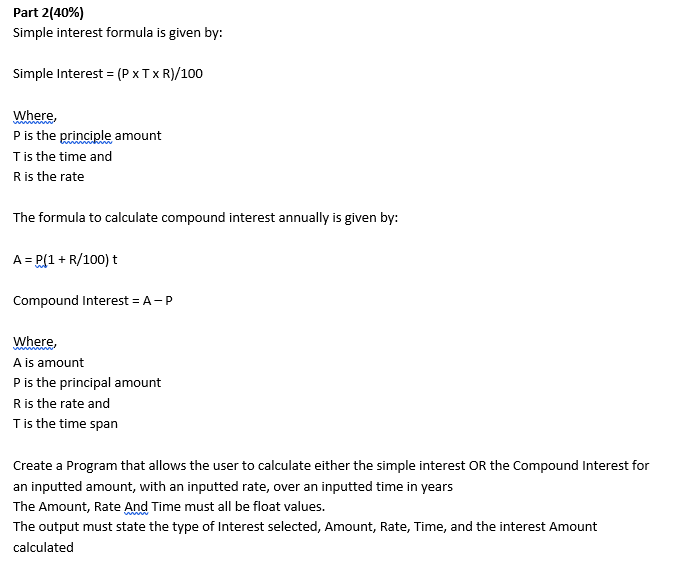

In [3]:
#Compound Interest rate forumula = A = P(1 + R/100)** 
# Simple interest formula = (PxTxR)/100

p = "Enter the Amount"
t = "Enter the Time"
r = "Enter the Rate"


S = "Simple"  
C = "Compound"

interest_type = input(f"Enter type of interest: {S}: or {C}: ") #Ask for user input 



if interest_type == "Simple": # interest type simple interest method
    principal_amount = float(input(f"{p}€: ")) # prinicpal amount input 
    time = float(input(f"{t} years: ")) # time input 
    rate = float(input(f"{r}%: ")) # rate input 
    
    interest = (principal_amount*time*rate)/100 #simple interest formula 
    total = principal_amount + interest  #Total amount after equatation is finished 
    
    print(f"Balance after Simple formula {time} year/s: €{total:2f}") # balance showing total amount 
    
elif interest_type == "Compound":  # interest type the compound interest method
    principal_amount = float(input(f"{p}€: ")) # principal amount input 
    time = float(input(f"{t} years: ")) # time input 
    rate = float(input(f"{r}%: ")) # rate input

    total = principal_amount * pow((1 + rate/ 100), time) #Compounud interest Formula 
    
    print(f'Balance after Compound formula {time} year/s: €{total:.2f}') # balance showing the total amount 
    

Enter type of interest: Simple: or Compound: Compound
Enter the Amount€: 1000
Enter the Time years: 10
Enter the Rate%: 10
Balance after Compound formula 10.0 year/s: €2593.74


In [7]:
#Compound Interest rate forumula = A = P(1 + R/100)** 
# Simple interest formula = (PxTxR)/100

p = "Enter the Amount"
t = "Enter the Time"
r = "Enter the Rate"


S = "Simple"  
C = "Compound"

interest_type = input(f"Enter type of interest: {S}: or {C}: ") #Ask for user input 



if interest_type == "Simple": # interest type simple interest method
    principal_amount = float(input(f"{p}€: ")) # prinicpal amount input 
    time = float(input(f"{t} years: ")) # time input 
    rate = float(input(f"{r}%: ")) # rate input 
    
    interest = (principal_amount*time*rate)/100 #simple interest formula 
    total = principal_amount + interest  #Total amount after equatation is finished 
    
    print(f"Balance after Simple formula {time} year/s: €{total:2f}") # balance showing total amount 
    
elif interest_type == "Compound":  # interest type the compound interest method
    principal_amount = float(input(f"{p}€: ")) # principal amount input 
    time = float(input(f"{t} years: ")) # time input 
    rate = float(input(f"{r}%: ")) # rate input

    total = principal_amount * pow((1 + rate/ 100), time) #Compounud interest Formula 
    
    print(f'Balance after Compound formula {time} year/s: €{total:.2f}') # balance showing the total amount 

Enter type of interest: Simple: or Compound: Simple
Enter the Amount€: 1000
Enter the Time years: 10
Enter the Rate%: 10
Balance after Simple formula 10.0 year/s: €2000.000000


## Conclusion 

Ultimately, the choice between simple and compound interest will depend on your specific financial situation and goals. If you want to minimize the overall cost of borrowing, simple interest may be a good option. On the other hand, if you want to maximize the potential return on your investment, compound interest may be more suitable